In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#from plotly.offline import plot
#import plotly.graph_objects as go
#import plotly.express as px

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
#from wordcloud import WordCloud, STOPWORDS

# Read Data

In [3]:
df_post = pd.read_csv('Positive.csv')
df_post.head()

Unnamed: 0                                               text
0           0  dem aide comey letter jason chaffetz tweet dar...
1           2  truth might fire october tension intelligence ...
2           3  videos civilians kill single airstrike identif...
3           4  print iranian woman sentence six prison iran r...
4          12  mystery surround third reich nazi germany stil...

In [4]:
df_neg = pd.read_csv('Negative.csv')
df_neg.head()

Unnamed: 0                                               text
0           1  ever feel life circle roundabout rather head s...
1           5  jackie mason voice reason exclusive clip breit...
2           7  paris france choose idealistic traditional can...
3           9  michael flynn resign security adviser seal pro...
4          10  organize action activist group morph barack pr...

In [5]:
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10361 entries, 0 to 10360
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10361 non-null  int64 
 1   text        10361 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.0+ KB


In [6]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7924 non-null   int64 
 1   text        7910 non-null   object
dtypes: int64(1), object(1)
memory usage: 123.9+ KB


In [7]:
df_post = df_post.dropna()

# Topic for Negative News

In [8]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(df_neg['text'])
doc_word.shape

(10361, 81007)

In [9]:
pd.DataFrame(doc_word.toarray(), index= df_neg['text'], columns=vectorizer.get_feature_names()).head(10)

aa  aabb  aachen  aadara  \
text                                                                           
ever feel life circle roundabout rather head st...   0     0       0       0   
jackie mason voice reason exclusive clip breitb...   0     0       0       0   
paris france choose idealistic traditional cand...   0     0       0       0   
michael flynn resign security adviser seal prop...   0     0       0       0   
organize action activist group morph barack pre...   0     0       0       0   
bbc produce spoof real housewives tv program co...   0     0       0       0   
guillermo barros schelotto argentine player set...   0     0       0       0   
scandal engulf fargo topple chairman chief exec...   0     0       0       0   
wednesday press conference tower nbc press mode...   0     0       0       0   
screenwriter ryan murphy produce fx series crim...   0     0       0       0   

                                                    aadmi  aadvantage  aag  \
text                                                                         
ever feel life circle roundabout rather head st...      0           0    0   
jackie mason voice reason exclusive clip breitb...      0           0    0   
paris france choose idealistic traditional cand...      0           0    0   
michael flynn resign security adviser seal prop...      0           0    0   
organize action activist group morph barack pre...      0           0    0   
bbc produce spoof real housewives tv program co...      0           0    0   
guillermo barros schelotto argentine player set...      0           0    0   
scandal engulf fargo topple chairman chief exec...      0           0    0   
wednesday press conference tower nbc press mode...      0           0    0   
screenwriter ryan murphy produce fx series crim...      0           0    0   

                                                    aah  aahhh  aaidh  ...  \
text                                                                   ...   
ever feel life circle roundabout rather head st...    0      0      0  ...   
jackie mason voice reason exclusive clip breitb...    0      0      0  ...   
paris france choose idealistic traditional cand...    0      0      0  ...   
michael flynn resign security adviser seal prop...    0      0      0  ...   
organize action activist group morph barack pre...    0      0      0  ...   
bbc produce spoof real housewives tv program co...    0      0      0  ...   
guillermo barros schelotto argentine player set...    0      0      0  ...   
scandal engulf fargo topple chairman chief exec...    0      0      0  ...   
wednesday press conference tower nbc press mode...    0      0      0  ...   
screenwriter ryan murphy produce fx series crim...    0      0      0  ...   

                                                    zwicky  zwiebel  zwigoff  \
text                                                                           
ever feel life circle roundabout rather head st...       0        0        0   
jackie mason voice reason exclusive clip breitb...       0        0        0   
paris france choose idealistic traditional cand...       0        0        0   
michael flynn resign security adviser seal prop...       0        0        0   
organize action activist group morph barack pre...       0        0        0   
bbc produce spoof real housewives tv program co...       0        0        0   
guillermo barros schelotto argentine player set...       0        0        0   
scandal engulf fargo topple chairman chief exec...       0        0        0   
wednesday press conference tower nbc press mode...       0        0        0   
screenwriter ryan murphy produce fx series crim...       0        0        0   

                                                    zwim  zwolenkiewicz  \
text                                                                      
ever feel life circle roundabout rather head st...     0              0   
jackie mason voice reason exclu

### Latent Semantic Analysis (LSA)

In [10]:
lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)

In [11]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [12]:
display_topics(lsa, vectorizer.get_feature_names(), 30)


Topic  0
government, include, group, campaign, right, report, country, ask, case, police, officials, plan, law, public, vote, force, attack, women, political, accord, republican, lead, administration, add, federal, build, question, issue, security, department

Topic  1
police, officer, shoot, kill, black, game, dr, life, children, mother, attack, men, arrest, young, drug, die, students, force, father, gun, video, case, body, feel, car, death, train, hospital, night, islamic

Topic  2
police, officials, attack, officer, government, russia, report, security, military, russian, islamic, force, kill, syria, department, administration, china, intelligence, foreign, north, investigation, arrest, group, korea, justice, general, statement, law, syrian, shoot

Topic  3
police, officer, vote, republican, campaign, black, republicans, shoot, democrats, voters, law, justice, judge, senate, election, case, senator, democratic, gun, right, poll, ryan, hear, women, breitbart, twitter, department, ra

### Non-Negative Matrix Factorization (NMF)


In [13]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/User/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [14]:
display_topics(nmf_model, vectorizer.get_feature_names(), 30)


Topic  0
women, life, children, black, ask, feel, right, book, mother, young, old, build, talk, father, love, really, little, open, parent, include, things, men, film, lot, woman, room, speak, small, read, sit

Topic  1
vote, campaign, republican, republicans, democrats, voters, election, democratic, senate, political, senator, poll, ryan, win, presidential, candidate, race, sanders, conservative, right, country, nominee, care, washington, issue, health, women, speak, lead, candidates

Topic  2
force, attack, government, islamic, military, group, syria, war, kill, country, saudi, security, fight, syrian, officials, iraq, turkey, bomb, strike, include, nations, afghanistan, taliban, countries, afghan, european, rebel, troop, castro, minister

Topic  3
police, officer, shoot, kill, attack, black, gun, arrest, report, department, video, chief, london, charge, scott, case, release, crime, car, enforcement, murder, drug, suspect, gang, violence, street, force, stop, men, protest

Topic  4


In [15]:
VT = pd.DataFrame(doc_topic.round(5),
             index = df_neg['text'],
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6",
                       "component_7","component_8","component_9","component_10"])
VT

component_1  component_2  \
text                                                                           
ever feel life circle roundabout rather head st...      0.13752      0.17130   
jackie mason voice reason exclusive clip breitb...      0.02593      0.01506   
paris france choose idealistic traditional cand...      0.04581      0.32334   
michael flynn resign security adviser seal prop...      0.04919      0.07037   
organize action activist group morph barack pre...      0.11834      0.22815   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.00000      0.00000   
twitter friday praise vladimir putin decision d...      0.00000      0.00000   
rapper unload black celebrities election fail c...      0.05586      0.05752   
green bay packers lose washington redskins drop...      0.00000      0.08876   
macy today grow union several name retail inclu...      0.11630      0.00000   

                                                    component_3  component_4  \
text                                                                           
ever feel life circle roundabout rather head st...      0.00000      0.00149   
jackie mason voice reason exclusive clip breitb...      0.01896      0.00056   
paris france choose idealistic traditional cand...      0.09443      0.00000   
michael flynn resign security adviser seal prop...      0.13619      0.00000   
organize action activist group morph barack pre...      0.19958      0.03991   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.34046      0.42384   
twitter friday praise vladimir putin decision d...      0.00000      0.00000   
rapper unload black celebrities election fail c...      0.00000      0.03819   
green bay packers lose washington redskins drop...      0.04055      0.02069   
macy today grow union several name retail inclu...      0.00000      0.01815   

                                                    component_5  component_6  \
text                                                                           
ever feel life circle roundabout rather head st...      0.00000      0.00000   
jackie mason voice reason exclusive clip breitb...      0.00000      0.06924   
paris france choose idealistic traditional cand...      0.09541      0.00672   
michael flynn resign security adviser seal prop...      0.21786      0.00000   
organize action activist group morph barack pre...      0.18546      0.00000   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.00000      0.00000   
twitter friday praise vladimir putin decision d...      0.00484      0.00000   
rapper unload black celebrities election fail c...      0.00000      0.00000   
green bay packers lose washington redskins drop...      0.02337      0.02301   
macy today grow union several name retail inclu...      0.30637      0.03181   

                                                    component_7  component_8  \
text                                                                           
ever feel life circle roundabout rather head st...      0.03070      0.00000   
jackie mason voice reason exclusive clip breitb...      0.00000      0.02122   
paris france choose idealistic traditional cand...      0.00000      0.04605   
michael flynn resign security adviser seal prop...      1.10533      0.00000   
organize action activist group morph barack pre...      0.40971      0.00000   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.00000      0.00000   
twitter friday praise vladimir putin decision d...      0.63733      0.00000   
rapper unload black celebrities election fail c...      0.00970      0.00520   
green bay packers lose washington redskins drop..

## Approve The Model

In [16]:
topics_Neg = pd.DataFrame(doc_topic, columns = ['women rights', 'Election','Military Strategy',
                                                 'Police','Financial','Trade','Media','Games',
                                                 'Disease','Laws'])
topics_Neg['main_topic'] = topics_Neg.idxmax(axis=1)
topics_Neg['text'] = df_neg['text']



In [17]:
topics_Neg.sample(10)


women rights  Election  Military Strategy    Police  Financial  \
5251       0.000000  0.000000           0.069785  0.091543   0.000000   
8014       0.041522  0.301719           0.171125  0.000000   0.137489   
4798       0.499373  0.123131           0.323110  0.031438   0.705290   
3068       0.050210  0.161270           0.074579  0.010567   0.063193   
7419       0.126472  0.000000           0.000000  0.000000   0.064024   
8915       0.013583  0.036931           0.101009  0.032026   0.000000   
8122       0.032428  0.000000           0.000000  0.004071   0.006566   
8995       0.115930  0.000000           0.043458  0.025030   0.033081   
8645       0.000000  0.000000           0.062661  0.013996   0.040048   
10270      0.132904  0.000000           0.000000  0.004048   0.000000   

          Trade     Media     Games   Disease      Laws    main_topic  \
5251   0.195133  0.181289  0.000000  0.010141  0.000000         Trade   
8014   0.087842  0.000000  0.055534  0.007905  0.054564      Election   
4798   0.338569  0.000000  0.000000  0.619225  0.013137     Financial   
3068   0.025352  0.040262  0.024805  0.073400  0.000000      Election   
7419   0.000000  0.000000  0.095920  0.007200  0.097197  women rights   
8915   0.379181  0.075677  0.000000  0.000000  0.000000         Trade   
8122   0.000000  0.210350  0.000000  0.005685  0.013411         Media   
8995   0.005604  0.046874  0.040675  0.001575  0.055206  women rights   
8645   0.000000  0.420718  0.000003  0.000000  0.033901         Media   
10270  0.000000  0.000000  0.000000  0.000000  0.000000  women rights   

                                                    text  
5251   beijing official southwest china unleash barra...  
8014   delhi prime minister narendra modi lead landsl...  
4798   norfolk va huge vertical rulers sprout beside ...  
3068   brief lose revere musician prince die minnesot...  
7419   rayshell byers ambitious dream college law gra...  
8915   lawmakers hawaii ask officials update continge...  
8122   washington post writer erik wemple update fake...  
8995   talk wicked case mondays almost anyone office ...  
8645   prosecutors ukraine investigate whether member...  
10270  video message young catholics throughout pope ...

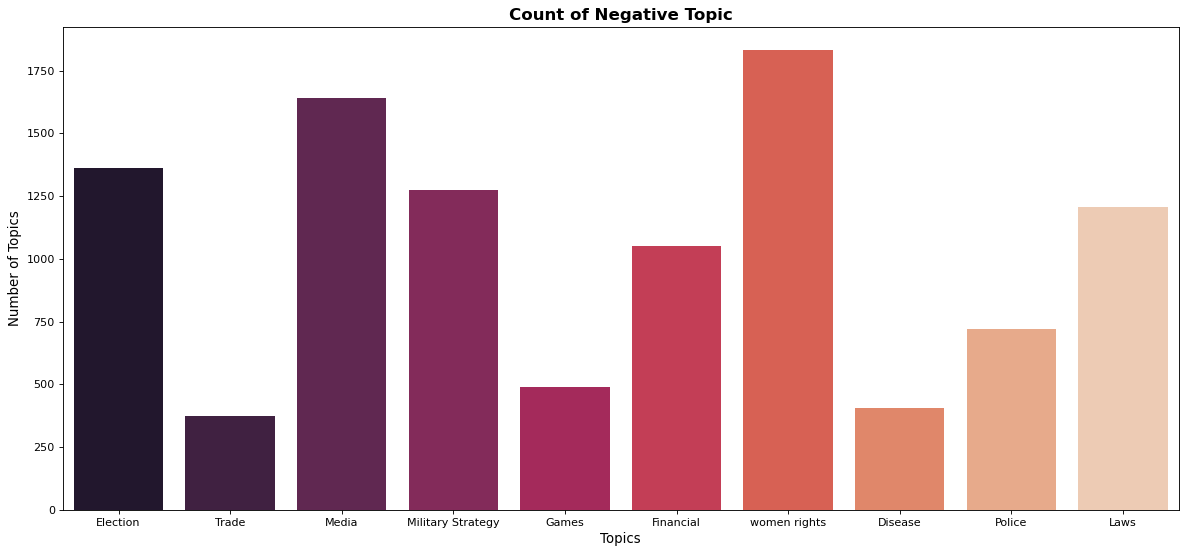

In [18]:
plt.figure(figsize=(18, 8), dpi=80)

Gender_col = sns.countplot(x="main_topic", data=topics_Neg, palette="rocket")
Gender_col.set_ylabel('Number of Topics', size= 12) 
Gender_col.set_xlabel('Topics', size= 12)
Gender_col.set_title('Count of Negative Topic', weight = 'bold', size =15);
plt.savefig('Negative Topic')

In [19]:
from sklearn.manifold import TSNE
tsne= TSNE(n_components=2, random_state=0, verbose=0)
tsne_result= tsne.fit_transform(doc_topic)
topics_Neg['X_tsne'] =tsne_result[:, 0]
topics_Neg['Y_tsne'] =tsne_result[:, 1]

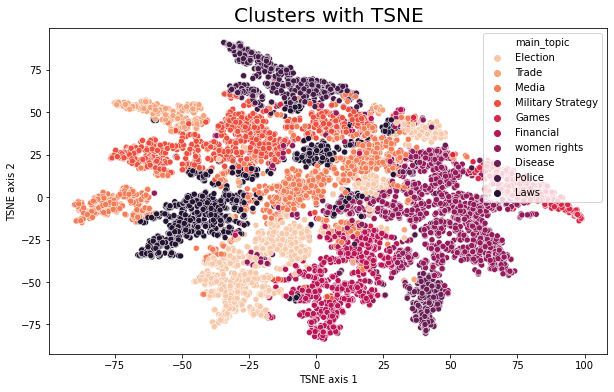

In [20]:
plt.figure(figsize=(10,6))
plt.title("Clusters with TSNE", fontsize=20)
plt.xlabel('TSNE axis 1')
plt.ylabel('TSNE axis 2')

sns.scatterplot(
    x="X_tsne", y="Y_tsne",
    hue=topics_Neg['main_topic'],
    palette=sns.color_palette("rocket_r", 10),
    data=topics_Neg,
    legend="full"
);

# WordCloud

In [21]:
from wordcloud import WordCloud 

def get_word_freq(topic, model, n_top_words, vocab):
    """
    This method will be called to count the most frequent words in specific topic.
    """
 
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

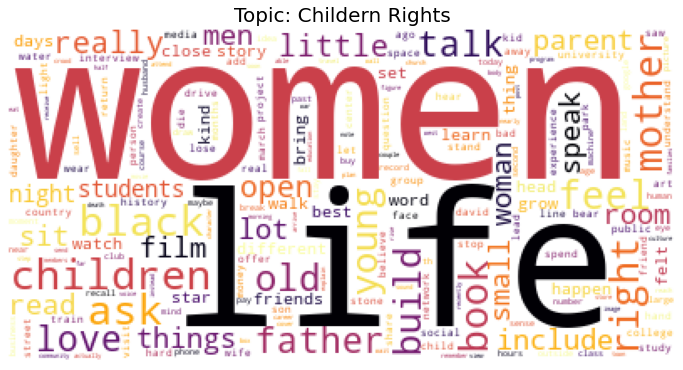

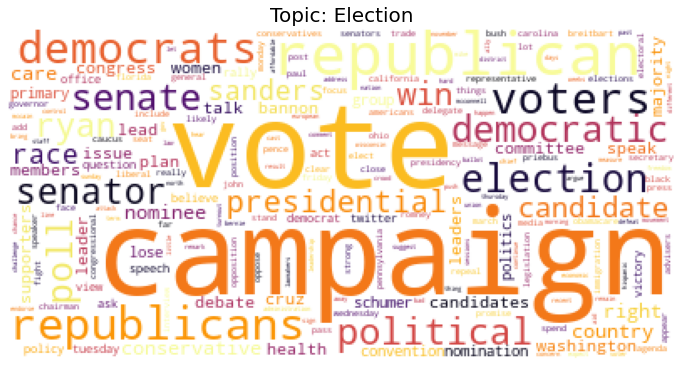

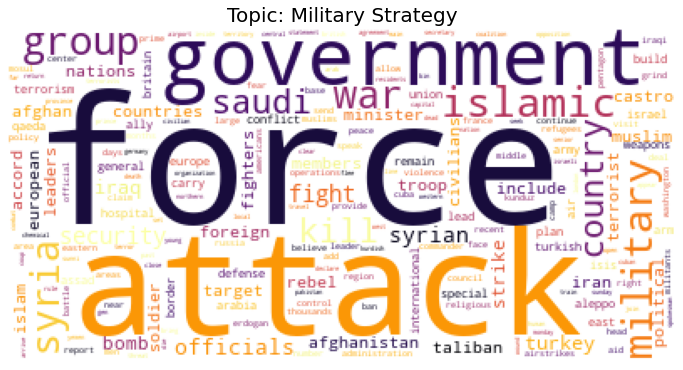

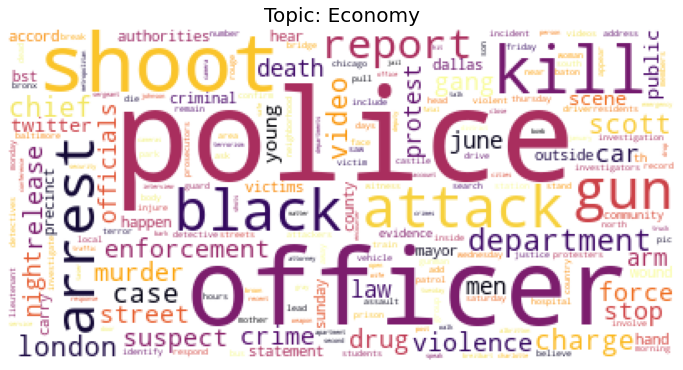

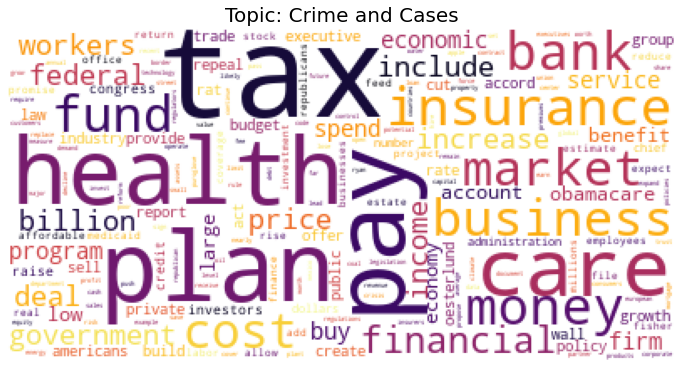

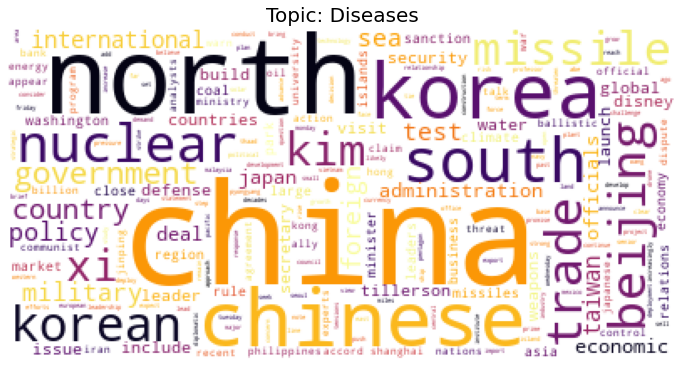

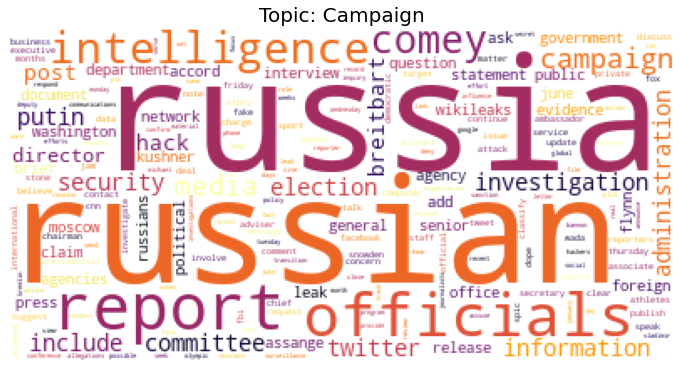

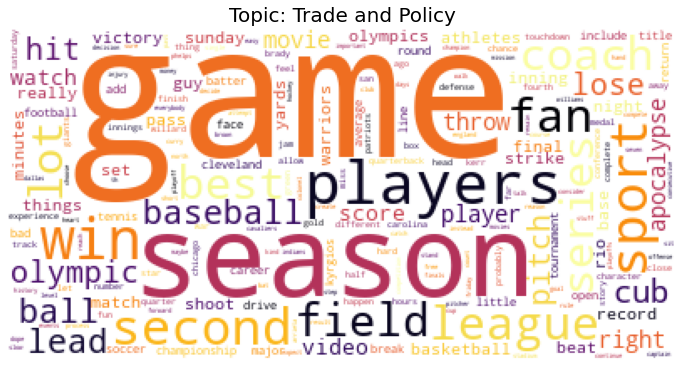

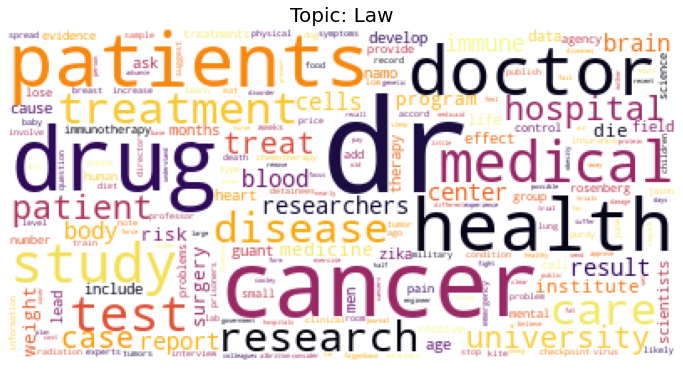

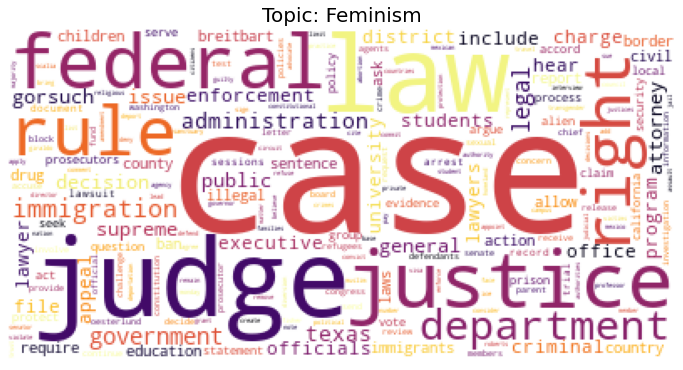

In [22]:
vocab=vectorizer.get_feature_names()
list_of_topics= ['Childern Rights', 'Election','Military Strategy',
                 'Economy','Crime and Cases','Diseases','Campaign',
                 'Trade and Policy','Law','Feminism']
for topic in range(10):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color='white', colormap=plt.cm.inferno).fit_words(dict(get_word_freq(topic, nmf_model, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();

# Topic for Positive News

In [23]:
df_post.head()

Unnamed: 0                                               text
0           0  dem aide comey letter jason chaffetz tweet dar...
1           2  truth might fire october tension intelligence ...
2           3  videos civilians kill single airstrike identif...
3           4  print iranian woman sentence six prison iran r...
4          12  mystery surround third reich nazi germany stil...

In [24]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(df_post['text'])
doc_word.shape

(7910, 83990)

In [25]:
pd.DataFrame(doc_word.toarray(), index= df_post['text'], columns=vectorizer.get_feature_names()).head(10)

aa  aaah  aab  aac  \
text                                                                     
dem aide comey letter jason chaffetz tweet darr...   0     0    0    0   
truth might fire october tension intelligence a...   0     0    0    0   
videos civilians kill single airstrike identify...   0     0    0    0   
print iranian woman sentence six prison iran re...   0     0    0    0   
mystery surround third reich nazi germany still...   0     0    0    0   
campaign demand fbi affirm russia tie election ...   0     0    0    0   
yes pay government troll social media blog foru...   0     0    0    0   
caddo nation tribal leader free spend days behi...   0     0    0    0   
fbi close post home headline world fbi close se...   0     0    0    0   
historic move nations committee vote thursday c...   0     0    0    0   

                                                    aachen  aadmi  aae  aaeeb  \
text                                                                            
dem aide comey letter jason chaffetz tweet darr...       0      0    0      0   
truth might fire october tension intelligence a...       0      0    0      0   
videos civilians kill single airstrike identify...       0      0    0      0   
print iranian woman sentence six prison iran re...       0      0    0      0   
mystery surround third reich nazi germany still...       0      0    0      0   
campaign demand fbi affirm russia tie election ...       0      0    0      0   
yes pay government troll social media blog foru...       0      0    0      0   
caddo nation tribal leader free spend days behi...       0      0    0      0   
fbi close post home headline world fbi close se...       0      0    0      0   
historic move nations committee vote thursday c...       0      0    0      0   

                                                    aaib  aaii  ...  zxua  \
text                                                            ...         
dem aide comey letter jason chaffetz tweet darr...     0     0  ...     0   
truth might fire october tension intelligence a...     0     0  ...     0   
videos civilians kill single airstrike identify...     0     0  ...     0   
print iranian woman sentence six prison iran re...     0     0  ...     0   
mystery surround third reich nazi germany still...     0     0  ...     0   
campaign demand fbi affirm russia tie election ...     0     0  ...     0   
yes pay government troll social media blog foru...     0     0  ...     0   
caddo nation tribal leader free spend days behi...     0     0  ...     0   
fbi close post home headline world fbi close se...     0     0  ...     0   
historic move nations committee vote thursday c...     0     0  ...     0   

                                                    zxycmwjdxj  zy  \
text                                                                 
dem aide comey letter jason chaffetz tweet darr...           0   0   
truth might fire october tension intelligence a...           0   0   
videos civilians kill single airstrike identify...           0   0   
print iranian woman sentence six prison iran re...           0   0   
mystery surround third reich nazi germany still...           0   0   
campaign demand fbi affirm russia tie election ...           0   0   
yes pay government troll social media blog foru...           0   0   
caddo nation tribal leader free spend days behi...           0   0   
fbi close post home headline world fbi close se...           0   0   
historic move nations committee vote thursday c...           0   0   

                                                    zybvwqhlbctginctv  \
text                                                                    
dem aide comey letter jason chaffetz tweet darr...                  0   
truth might fire october tension intelligence a...                  0   
videos civilians kill single airstrike identify...                  0   
print iranian woman sentence six prison iran re...         

### Latent Semantic Analysis (LSA)

In [26]:
lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.07671075, 0.02407726, 0.01970336, 0.016394  , 0.01507207,
       0.01302879, 0.01140243, 0.01070729, 0.0100612 , 0.00945648])

In [27]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [28]:
display_topics(lsa, vectorizer.get_feature_names(), 30)


Topic  0
know, government, war, world, new, right, country, money, vote, russia, pay, election, media, force, change, bad, report, believe, happen, bank, god, political, place, americans, job, life, really, include, military, control

Topic  1
money, bank, debt, pay, reserve, federal, gold, government, tax, california, job, currency, create, economy, water, value, problem, loan, dollar, food, dollars, supply, credit, hard, feed, bad, financial, spend, really, buy

Topic  2
war, bank, money, debt, russia, government, gold, syria, reserve, federal, military, russian, syrian, currency, pay, foreign, financial, policy, jewish, force, arab, china, value, attack, nuclear, create, international, iraq, nato, note

Topic  3
jewish, arab, arabs, morris, jews, palestine, water, israel, land, zionist, california, cleanse, god, ethnic, population, expel, country, plan, haganah, war, villages, home, place, gurion, ben, world, british, order, palestinian, palestinians

Topic  4
jewish, fbi, election

### Non-Negative Matrix Factorization (NMF)

In [29]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/User/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [30]:
display_topics(nmf_model, vectorizer.get_feature_names(), 30)


Topic  0
government, country, pay, job, tax, know, money, hard, family, americans, food, michael, bad, welfare, care, things, right, world, place, lot, free, really, california, month, economy, let, life, home, countries, big

Topic  1
money, bank, debt, reserve, gold, federal, pay, government, create, currency, value, financial, supply, dollar, dollars, world, market, control, feed, central, loan, credit, economy, paper, note, issue, deposit, congress, trillion, national

Topic  2
war, russia, syria, military, russian, government, world, force, syrian, nuclear, attack, foreign, iraq, nato, policy, western, china, media, putin, political, group, country, aleppo, east, iran, assad, international, washington, arm, weapons

Topic  3
jewish, arab, arabs, morris, jews, palestine, israel, zionist, war, land, cleanse, plan, ethnic, expel, order, haganah, population, villages, british, ben, gurion, attack, palestinian, policy, force, transfer, home, palestinians, note, zionists

Topic  4
fbi,

In [31]:
VT = pd.DataFrame(doc_topic.round(6),
             index = df_post['text'],
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6",
                       "component_7","component_8","component_9","component_10"])
VT

component_1  component_2  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.057882     0.000000   
truth might fire october tension intelligence a...     0.051228     0.000000   
videos civilians kill single airstrike identify...     0.000000     0.000000   
print iranian woman sentence six prison iran re...     0.000000     0.000000   
mystery surround third reich nazi germany still...     0.000000     0.005435   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     0.000000     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.000000     0.000000   
share although vandal cool destroy hollywood st...     0.032026     0.033939   
nato russia hold parallel exercise balkans pres...     0.000000     0.000000   
david swanson author activist journalist radio ...     0.023489     0.089666   

                                                    component_3  component_4  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.000000     0.000000   
truth might fire october tension intelligence a...     0.351835     0.047556   
videos civilians kill single airstrike identify...     0.122972     0.016078   
print iranian woman sentence six prison iran re...     0.002053     0.002953   
mystery surround third reich nazi germany still...     0.253864     0.009663   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     0.000000     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.000000     0.000000   
share although vandal cool destroy hollywood st...     0.000000     0.011333   
nato russia hold parallel exercise balkans pres...     0.291095     0.000000   
david swanson author activist journalist radio ...     0.251762     0.018906   

                                                    component_5  component_6  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.515786     0.000000   
truth might fire october tension intelligence a...     0.143297     0.000000   
videos civilians kill single airstrike identify...     0.002304     0.045077   
print iranian woman sentence six prison iran re...     0.037707     0.000000   
mystery surround third reich nazi germany still...     0.000000     0.003939   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     0.000000     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.541585     0.000000   
share although vandal cool destroy hollywood st...     0.041529     0.008989   
nato russia hold parallel exercise balkans pres...     0.000000     0.036858   
david swanson author activist journalist radio ...     0.031173     0.005004   

                                                    component_7  component_8  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.099488     0.000000   
truth might fire october tension intelligence a...     0.033544     0.000000   
videos civilians kill single airstrike identify...     0.000000     0.000000   
print iranian woman sentence six prison iran re...     0.000000     0.000000   
mystery surround third reich nazi germany still...     0.000000     0.011406   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     1.100164     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.000000     0.000000   
share although vandal cool destroy hollywood st...     0.031416     0.047962   
nato russia hold parallel exercise balkans pres..

### Latent Dirichlet Allocation (LDA)

In [32]:
# Transpose it so the terms are the rows
doc_words = vectorizer.transform(df_post['text']).transpose()

pd.DataFrame(doc_words.toarray(), vectorizer.get_feature_names())


0     1     2     3     4     5     6     7     8     \
aa                       0     0     0     0     0     0     0     0     0   
aaah                     0     0     0     0     0     0     0     0     0   
aab                      0     0     0     0     0     0     0     0     0   
aac                      0     0     0     0     0     0     0     0     0   
aachen                   0     0     0     0     0     0     0     0     0   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
zylinderkopfdichtung     0     0     0     0     0     0     0     0     0   
zytsov                   0     0     0     0     0     0     0     0     0   
zyuganov                 0     0     0     0     0     0     0     0     0   
zyzs                     0     0     0     0     0     0     0     0     0   
zz                       0     0     0     0     0     0     0     0     0   

                      9     ...  7900  7901  7902  7903  7904  7905  7906  \
aa                       0  ...     0     0     0     0     0     0     0   
aaah                     0  ...     0     0     0     0     0     0     0   
aab                      0  ...     0     0     0     0     0     0     0   
aac                      0  ...     0     0     0     0     0     0     0   
aachen                   0  ...     0     0     0     0     0     0     0   
...                    ...  ...   ...   ...   ...   ...   ...   ...   ...   
zylinderkopfdichtung     0  ...     0     0     0     0     0     0     0   
zytsov                   0  ...     0     0     0     0     0     0     0   
zyuganov                 0  ...     0     0     0     0     0     0     0   
zyzs                     0  ...     0     0     0     0     0     0     0   
zz                       0  ...     0     0     0     0     0     0     0   

                      7907  7908  7909  
aa                       0     0     0  
aaah                     0     0     0  
aab                      0     0     0  
aac                      0     0     0  
aachen                   0     0     0  
...                    ...   ...   ...  
zylinderkopfdichtung     0     0     0  
zytsov                   0     0     0  
zyuganov                 0     0     0  
zyzs                     0     0     0  
zz                       0     0     0  

[83990 rows x 7910 columns]

In [33]:
from gensim import models, matutils
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_words)

In [34]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [35]:
len(id2word)

83990

In [36]:
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)

In [37]:
lda.print_topics()

[(0,
  '0.007*"die" + 0.004*"und" + 0.004*"des" + 0.004*"china" + 0.003*"den" + 0.003*"bundy" + 0.003*"das" + 0.002*"zu" + 0.002*"von" + 0.002*"mit"'),
 (1,
  '0.004*"world" + 0.003*"health" + 0.003*"gold" + 0.003*"new" + 0.003*"know" + 0.003*"water" + 0.003*"market" + 0.003*"food" + 0.003*"study" + 0.003*"body"'),
 (2,
  '0.009*"war" + 0.007*"russia" + 0.006*"fbi" + 0.005*"government" + 0.005*"military" + 0.004*"syria" + 0.004*"russian" + 0.004*"world" + 0.004*"new" + 0.004*"force"'),
 (3,
  '0.012*"vote" + 0.009*"election" + 0.006*"campaign" + 0.005*"media" + 0.004*"know" + 0.004*"new" + 0.004*"world" + 0.004*"win" + 0.004*"black" + 0.004*"political"'),
 (4,
  '0.004*"right" + 0.004*"know" + 0.004*"police" + 0.004*"new" + 0.003*"law" + 0.003*"election" + 0.003*"government" + 0.003*"country" + 0.002*"women" + 0.002*"stand"')]

### CorEx model

In [38]:
from corextopic import corextopic as ct
words = list(np.asarray(vectorizer.get_feature_names()))
topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df_post)

In [39]:
topics = topic_model.get_topics()
#for n,topic in enumerate(topics):
 #3   topic_words,_ = zip(*topic)
   # print('{}: '.format(n) + ','.join(topic_words))
topics

[[('world', 0.14622215737115754, 1.0),
  ('government', 0.12378184638528841, 1.0),
  ('war', 0.11684403904324511, 1.0),
  ('create', 0.11542052761457919, 1.0),
  ('know', 0.11538476201651662, 1.0),
  ('include', 0.11412441969924567, 1.0),
  ('control', 0.11168722277422141, 1.0),
  ('political', 0.10995760266880936, 1.0),
  ('fact', 0.10961816671648619, 1.0),
  ('order', 0.10782144030439048, 1.0)],
 [('si', 0.027616894673746097, 1.0),
  ('este', 0.026242186879828773, 1.0),
  ('im', 0.023338452960637298, 1.0),
  ('und', 0.02231807084215591, 1.0),
  ('das', 0.020878847971937804, 1.0),
  ('den', 0.020874332295453157, 1.0),
  ('auf', 0.0203791669415863, 1.0),
  ('sich', 0.02007425397874692, 1.0),
  ('er', 0.020057317567145273, 1.0),
  ('ein', 0.01973439494793462, 1.0)],
 [('life', 0.09292805192008227, 1.0),
  ('cause', 0.08549720644249778, 1.0),
  ('study', 0.07913423044826023, 1.0),
  ('form', 0.07480725625286902, 1.0),
  ('body', 0.07267118717056259, 1.0),
  ('human', 0.07215053104731811,

In [40]:
topics = topic_model.get_topics()

In [41]:
#topic_model.get_top_docs(topic=4, n_docs=7)

After applying some models, the best topics results are with NMF model.

## Approve The Model


In [42]:
topics_Post = pd.DataFrame(doc_topic, columns = ['Taxs ','Financial','Wars','israel','Laws','Study',
                                                 'Election','Climate','Faith','Policy'])
topics_Post['main_topic'] = topics_Post.idxmax(axis=1)
topics_Post['text'] = df_post['text']


In [43]:
topics_Post.sample(10)

Taxs   Financial      Wars    israel      Laws     Study  Election  \
5325  0.000000   0.000000  0.000000  0.000000  0.005217  0.000000  0.011467   
2224  0.023880   0.008037  0.000000  0.003189  0.076059  0.003394  0.015369   
4398  0.054948   0.000000  0.000000  0.000000  0.034350  0.000000  0.077692   
496   0.015722   0.001820  0.000000  0.000000  0.078685  0.000000  0.009493   
7417  0.006232   0.000000  0.007078  0.000000  0.022513  0.000000  0.024340   
5997  0.144230   0.021817  0.038367  0.000000  0.218176  0.000000  0.055560   
474   0.275036   0.152861  0.486903  0.000000  0.176638  0.000000  0.295234   
5977  0.009124   0.004875  0.000000  0.000000  0.000000  0.000000  0.000000   
7444  0.068601   0.000000  1.325583  0.000000  0.000000  0.000000  0.000000   
1246  0.000000   0.019386  0.105655  0.024759  0.062192  0.018731  0.338382   

       Climate     Faith    Policy main_topic  \
5325  0.000000  0.000000  0.079746     Policy   
2224  0.011939  0.055715  0.023161       Laws   
4398  0.331894  0.229132  0.072458    Climate   
496   0.000000  0.054201  0.026880       Laws   
7417  0.008284  0.066900  0.001265      Faith   
5997  0.000000  0.231843  0.120569      Faith   
474   0.000000  0.000000  0.323038       Wars   
5977  0.010350  0.001367  0.003470    Climate   
7444  0.000000  0.233965  0.194074       Wars   
1246  0.001060  0.048163  0.000000   Election   

                                                   text  
5325  within preparedness community tendency individ...  
2224  criminal minions catch push voter fraud elect ...  
4398  seattle happen seattle environment reporter ly...  
496   renaissance october share birth nation bomb we...  
7417  reason unknown canadians unable access raynard...  
5997  post eddie millions around world constantly de...  
474   stake election paul craig roberts presstitutes...  
5977  meet secretary send million check iran october...  
7444  un soltero alcanza primer ochomil ropa amonton...  
1246  islamic jihadi decide vehicle attack veteran s...

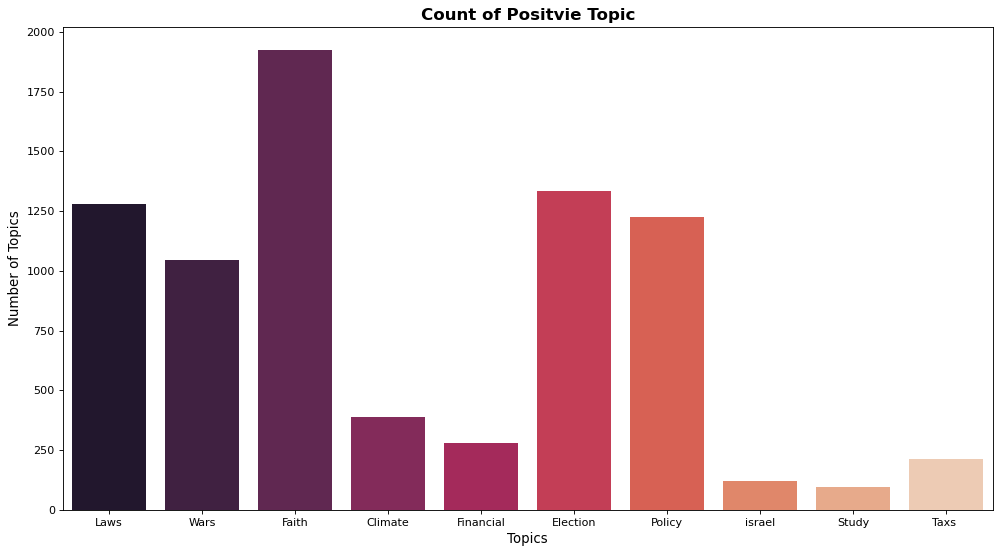

In [44]:
plt.figure(figsize=(15, 8), dpi=80)

Gender_col = sns.countplot(x="main_topic", data=topics_Post, palette="rocket")
Gender_col.set_ylabel('Number of Topics', size= 12) 
Gender_col.set_xlabel('Topics', size= 12)
Gender_col.set_title('Count of Positvie Topic', weight = 'bold', size =15);
plt.savefig('Positvie Topic')

# Visualize TSNE

In [45]:
from sklearn.manifold import TSNE
tsne= TSNE(n_components=2, random_state=0, verbose=0)
tsne_result= tsne.fit_transform(doc_topic)

In [46]:
topics_Post['X_tsne'] =tsne_result[:, 0]
topics_Post['Y_tsne'] =tsne_result[:, 1]

In [47]:
topics_Post

Taxs   Financial      Wars    israel      Laws     Study  Election  \
0     0.057882   0.000000  0.000000  0.000000  0.515786  0.000000  0.099488   
1     0.051228   0.000000  0.351835  0.047556  0.143297  0.000000  0.033544   
2     0.000000   0.000000  0.122972  0.016078  0.002304  0.045077  0.000000   
3     0.000000   0.000000  0.002053  0.002953  0.037707  0.000000  0.000000   
4     0.000000   0.005435  0.253864  0.009663  0.000000  0.003939  0.000000   
...        ...        ...       ...       ...       ...       ...       ...   
7905  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  1.100164   
7906  0.000000   0.000000  0.000000  0.000000  0.541585  0.000000  0.000000   
7907  0.032026   0.033939  0.000000  0.011333  0.041529  0.008989  0.031416   
7908  0.000000   0.000000  0.291095  0.000000  0.000000  0.036858  0.000000   
7909  0.023489   0.089666  0.251762  0.018906  0.031173  0.005004  0.000000   

       Climate     Faith    Policy main_topic  \
0     0.000000  0.150164  0.000000       Laws   
1     0.000000  0.169515  0.089361       Wars   
2     0.000000  0.179622  0.000000      Faith   
3     0.000000  0.045408  0.024640      Faith   
4     0.011406  0.077237  0.017819       Wars   
...        ...       ...       ...        ...   
7905  0.000000  0.000000  0.000000   Election   
7906  0.000000  0.000000  0.000000       Laws   
7907  0.047962  0.218716  0.006127      Faith   
7908  0.000000  0.000000  0.000000       Wars   
7909  0.098542  0.154450  0.225395       Wars   

                                                   text     X_tsne     Y_tsne  
0     dem aide comey letter jason chaffetz tweet dar... -59.520199  28.247911  
1     truth might fire october tension intelligence ...  52.761402  26.935804  
2     videos civilians kill single airstrike identif... -35.309517  -7.614747  
3     print iranian woman sentence six prison iran r...  -4.431376 -48.329052  
4     mystery surround third reich nazi germany stil...  58.813202  21.995949  
...                                                 ...        ...        ...  
7905  drug substance abuse ruin substance addiction ...   0.166661  80.765839  
7906  doctor prescribe deadly opioid pain relate iss... -68.498215  29.030838  
7907  forget man decide presidential election persua... -48.356461 -31.469851  
7908  chart restaurant performance index head south ...  65.393112  24.799623  
7909  brandon turbeville anti fluoridation activists...  51.716709  23.997784  

[7910 rows x 14 columns]

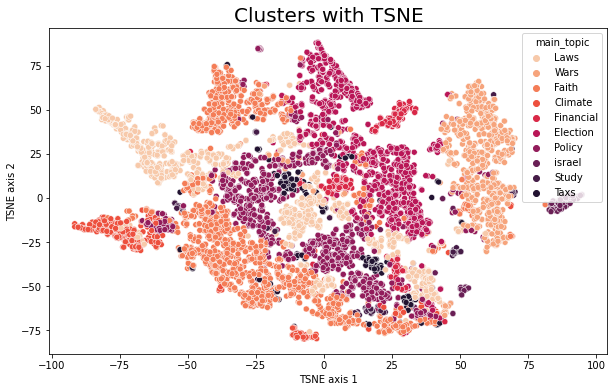

In [48]:
plt.figure(figsize=(10,6))
plt.title("Clusters with TSNE", fontsize=20)
plt.xlabel('TSNE axis 1')
plt.ylabel('TSNE axis 2')

sns.scatterplot(
    x="X_tsne", y="Y_tsne",
    hue=topics_Post['main_topic'],
    palette=sns.color_palette("rocket_r", 10),
    data=topics_Post,
    legend="full"
);


# WordCloud

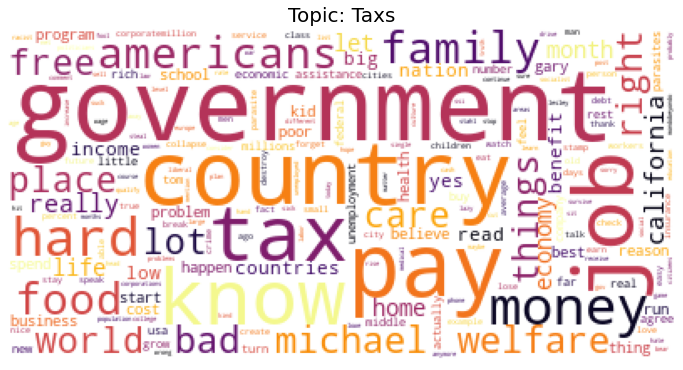

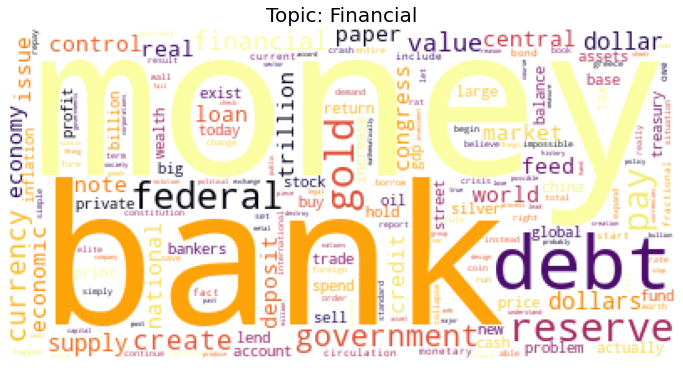

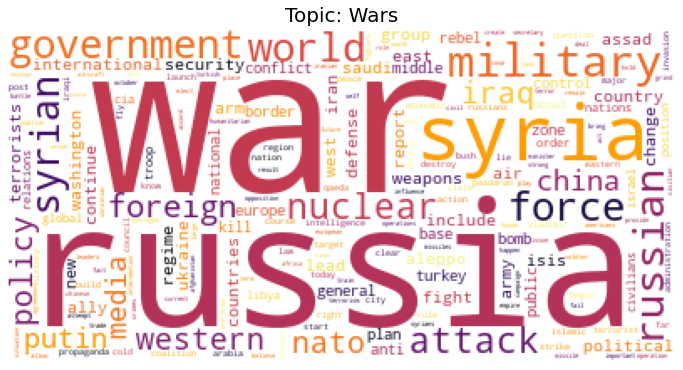

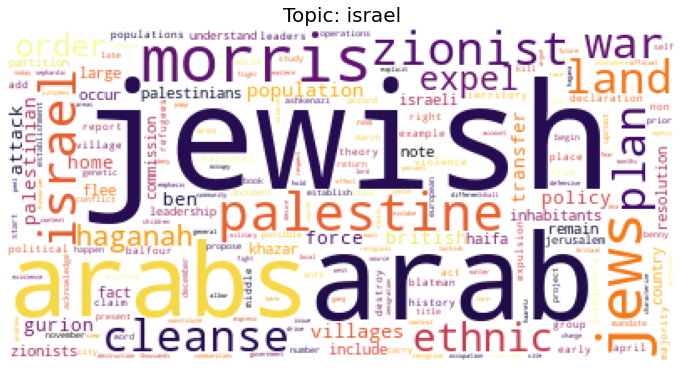

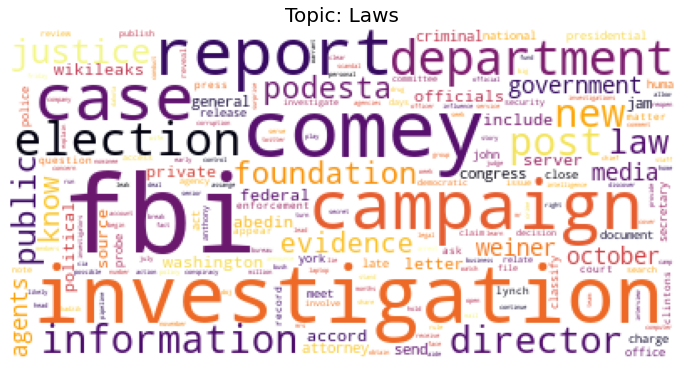

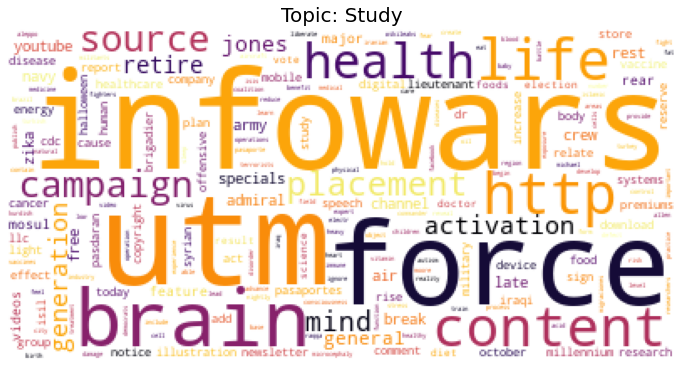

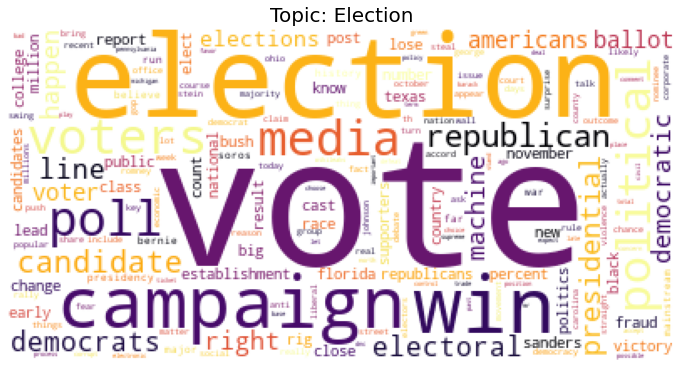

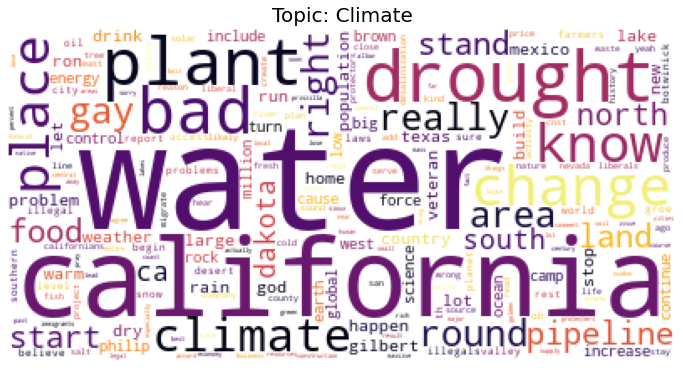

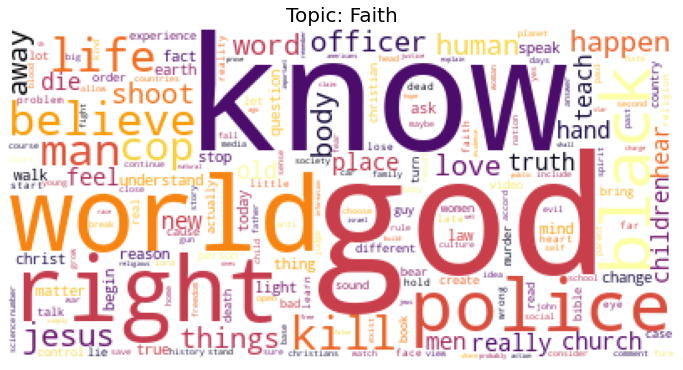

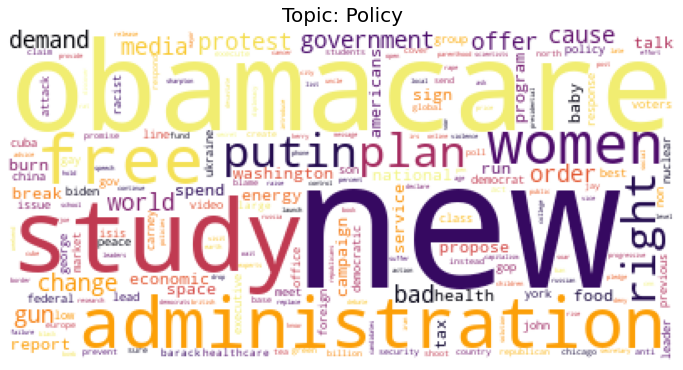

In [49]:
vocab=vectorizer.get_feature_names()
list_of_topics= ['Taxs','Financial','Wars','israel','Laws','Study',
                 'Election','Climate','Faith','Policy']
for topic in range(10):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color='white', colormap=plt.cm.inferno).fit_words(dict(get_word_freq(topic, nmf_model, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();

# Clustering

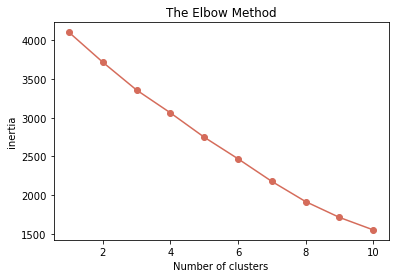

In [50]:
from sklearn.cluster import KMeans

inertia=[]
list_num_clusters=list(range(1,11))
for num_clusters in list_num_clusters:
    km=KMeans(n_clusters=num_clusters)
    km.fit(doc_topic)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters, inertia, color= '#D56C5B')
plt.scatter(list_num_clusters, inertia, color= '#D56C5B')
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("inertia");
plt.savefig('elbow')

# Apply Classification Algorithm

In [51]:
import nltk
df_neg.drop("Unnamed: 0", axis = 1, inplace = True)

df_post.drop("Unnamed: 0", axis = 1, inplace = True)

In [52]:
df_neg['target'] = 0 
df_post['target'] = 1

In [53]:
df= pd.concat([df_neg,df_post])
df.head()

text  target
0  ever feel life circle roundabout rather head s...       0
1  jackie mason voice reason exclusive clip breit...       0
2  paris france choose idealistic traditional can...       0
3  michael flynn resign security adviser seal pro...       0
4  organize action activist group morph barack pr...       0

In [54]:
X = df['text']
y= df['target']

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

aa  aab  aabb  aac  aachen  aadmi  aadvantage  aag  aah  aahhh  ...  zy  \
0   0    0     0    0       0      0           0    0    0      0  ...   0   
1   0    0     0    0       0      0           0    0    0      0  ...   0   
2   0    0     0    0       0      0           0    0    0      0  ...   0   
3   0    0     0    0       0      0           0    0    0      0  ...   0   
4   0    0     0    0       0      0           0    0    0      0  ...   0   

   zyaira  zybvwqhlbctginctv  zygankow  zylinderkopfdichtung  zytiga  zytsov  \
0       0                  0         0                     0       0       0   
1       0                  0         0                     0       0       0   
2       0                  0         0                     0       0       0   
3       0                  0         0                     0       0       0   
4       0                  0         0                     0       0       0   

   zyuganov  zyzs  zz  
0         0     0   0  
1         0     0   0  
2         0     0   0  
3         0     0   0  
4         0     0   0  

[5 rows x 105630 columns]

In [58]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

aa  aa aa  aa add  aa armament  aa ball  aa binghamton  aa birmingham  \
0   0      0       0            0        0              0              0   
1   0      0       0            0        0              0              0   
2   0      0       0            0        0              0              0   
3   0      0       0            0        0              0              0   
4   0      0       0            0        0              0              0   

   aa boxlayout  aa control  aa economic  ...  zytiga acquire  zytsov  \
0             0           0            0  ...               0       0   
1             0           0            0  ...               0       0   
2             0           0            0  ...               0       0   
3             0           0            0  ...               0       0   
4             0           0            0  ...               0       0   

   zytsov city  zyuganov  zyuganov mild  zyuganov surrender  zyzs  zyzs qxxk  \
0            0         0              0                   0     0          0   
1            0         0              0                   0     0          0   
2            0         0              0                   0     0          0   
3            0         0              0                   0     0          0   
4            0         0              0                   0     0          0   

   zz  zz akg  
0   0       0  
1   0       0  
2   0       0  
3   0       0  
4   0       0  

[5 rows x 2729702 columns]

In [59]:
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [60]:
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

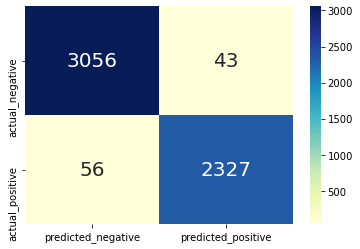

In [62]:
c1 = conf_matrix(y_test, y_pred_cv1)

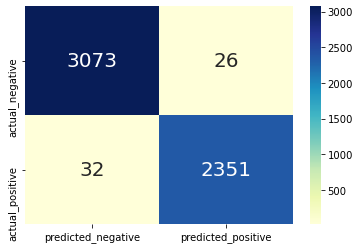

In [63]:
c2 = conf_matrix(y_test, y_pred_cv2)

In [64]:
results = pd.DataFrame(list(zip(c1, c2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

LogReg1  LogReg2
Accuracy     0.982    0.989
Precision    0.982    0.989
Recall       0.977    0.987
F1 Score     0.979    0.988

### naive_bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [66]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

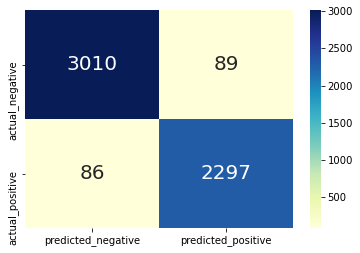

In [67]:
c3 = conf_matrix(y_test, y_pred_cv1_nb)#MultinomialNB

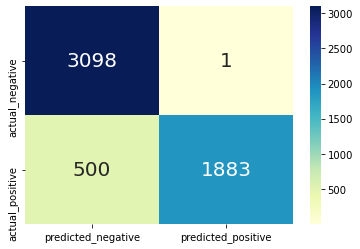

In [68]:
c4 = conf_matrix(y_test, y_pred_cv2_nb)#BernoulliNB

In [71]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(c3, c4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MultinomialNB', 'BernoulliNB']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

LogReg1  LogReg2    NB1    NB2  MultinomialNB  BernoulliNB
Accuracy     0.982    0.989  0.968  0.909          0.968        0.909
Precision    0.982    0.989  0.963  0.999          0.963        0.999
Recall       0.977    0.987  0.964  0.790          0.964        0.790
F1 Score     0.979    0.988  0.963  0.882          0.963        0.882

# Similarity_Measures

In [85]:
combos = df['text']

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df
cv = CountVectorizer()
X = cv.fit_transform(corpus)
pd.DataFrame(X.toarray(),columns=cv.get_feature_names())

target  text
0       0     1
1       1     0

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the document-term matrix with TF-IDF vectorizer
cv_tfidf = TfidfVectorizer(stop_words="english")
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
dt_tfidf = pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

target  text
0     0.0   1.0
1     1.0   0.0